# Predicting Medical Appointment No-shows

<img src='https://www.questionpro.com/blog/wp-content/uploads/2015/07/preguntas_y_respuestas_2.jpg'>

### A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

— Why do 30% of patients miss their scheduled appointments?

110k medical appointments with its 14 variables (characteristics). Variable names are self-explanatory.

Dataset from: https://www.kaggle.com/joniarroba/noshowappointments

### Data Dictionary
- PatientId - Identification of a patient 
- AppointmentID - Identification of each appointment 
- Gender = Male or Female, female is the greater proportion, woman takes way more care of they health in comparison to man
- ScheduledDay = The day someone called or registered the appointment, this is before appointment of course
- AppointmentDay = The day of the actuall appointment, when they have to visit the doctor
- Age = How old is the patient
- Neighbourhood = Where the appointment takes place, means the place where the hospital is located and not where the patient lives
- Scholarship = Ture of False
- Hipertension = True or False 
- Diabetes = True or False 
- Alcoholism = True or False 
- Handcap = True or False
- SMS_received = If received the messages sent to the patient
- No-show = True or False

In [3]:
# load data set
import pandas as pd
data = pd.read_csv('Appointment_data.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Table of Contents

[1. Load Data Set and Python Packages](#ML1)
 - [Load Python Packages](#ML1-1)
 - [Load and Display Data Set](#ML1-2)
 
[2. Data Quality Assessment](#ML2)
 - [Check Missing Values](#ML2-1)
 - [Check Duplicated Values](#ML2-2)
 - [Check Category Variables](#ML2-3)
 - [Check Numerical Variables](#ML2-4)

[3. Exploratory Data Analysis and Feature Selection](#ML3)
 - [Exploring on "ScheduledDay" and "AppointmentDay"](#ML3-1)
 - [Exploring on Given Binary Dummy Variables](#ML3-2)
 - [Exploring on "Neighbourhood"](#ML3-3)
 - [Exploring on "Age"](#ML3-4)
 - [Exploring on "Gender"](#ML3-5)
 - [Exploring on "PatientId"](#ML3-6)
 
[4. Building Models on Imbalanced Data](#ML4)
 - [Transforming the Data Set](#ML4-1)
 - [Define Feature Matrix and Target Array](#ML4-2)
 - [Prepare Data for Model Training](#ML4-3)
 - [Train Model - Logistic Regression](#ML4-4)

[5. Building Models on Balanced Data](#ML5)
 - [Create Balanced Data Set](#ML5-1)
 - [Prepare Data for Model Training](#ML5-2)
 - [Logistic Regression](#ML5-3)
 - [Random Forest Classifier](#ML5-4)
 - [K-Nearest Neighbors Classifier](#ML5-5)
 
[6. Conclusion](#6)
 - [Result Summary](#6-1)
 - [Features Importance](#6-2)

### 1. Load Data Set and Python Packages<a id="ML1"></a>

#### Load Python Packages<a id="ML1-1"></a>

In [1]:
# Data manipulation
import random
import numpy as np
import pandas as pd
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

# Data preprocessing and model evaluation
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# warnings ignore
import warnings
warnings.filterwarnings('ignore')

#### Load and Display Data Set<a id="ML1-2"></a>

In [2]:
# load data set
data = pd.read_csv('Appointment_data.csv')

In [85]:
# display appointment data set
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2. Data Quality Assessment<a id="ML2"></a>

#### Check Missing Values<a id="ML2-1"></a>

In [86]:
# check if data set contains missing values
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


No missing value exist in this data set.

#### Check Duplicated Values<a id="ML2-2"></a>

In [87]:
# check if data set contains duplicated appointment ID
print(data.AppointmentID.duplicated().sum())

0


There is no duplicated appointments record in this data set. The data is clean.

In [3]:
# check if data set contains duplicated patient ID
data.PatientId = data.PatientId.astype(int)
data.PatientId.duplicated().sum()

48228

48228 out of 110527 (~43.6%) patients have more than one appointment records in this data set.

Some people may constantly have higher probability of not-show. We will explore more on this in EDA part.

#### Check Category Variables<a id="ML2-3"></a>

In [5]:
# check categories in category variables
print(f"Gender: {set(data.Gender)}")
print(f"Scholarship: {set(data.Scholarship)}")
print(f"Hipertension: {set(data.Hipertension)}")
print(f"Diabetes: {set(data.Diabetes)}")
print(f"Handcap: {set(data.Handcap)}")
print(f"SMS_received: {set(data.SMS_received)}")
print(f"SMS_received: {set(data.SMS_received)}")
print(f"No-show: {set(data['No-show'])}")

# check number of categories in variable 'Neighbourhood'
num_neigh = len(set(data.Neighbourhood))
print(f'Number of different neighbourhood: {num_neigh}')

Gender: {'M', 'F'}
Scholarship: {0, 1}
Hipertension: {0, 1}
Diabetes: {0, 1}
Handcap: {0, 1, 2, 3, 4}
SMS_received: {0, 1}
SMS_received: {0, 1}
No-show: {'No', 'Yes'}
Number of different neighbourhood: 81


Based on above summary, we will do two more assessment:

- variable name "No-show" and its categories are ambiguous, rename it.
- variable "Handcap" is not binary, check its distribution.

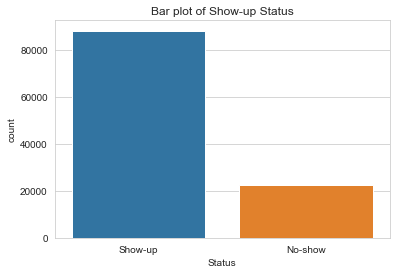

Percentage of Show-up Status: 


Show-up    79.806744
No-show    20.193256
Name: Status, dtype: float64

In [4]:
# rename No-show column to Status and set "No" to "Show-up", "Yes" to "No-show"
data.rename(columns = {"No-show": "Status"}, inplace=True)
data.Status = data.Status.astype('category').cat.rename_categories(['Show-up', 'No-show'])

# plot distribution of Show-up Status
sns.countplot(x="Status", data=data)
plt.title("Bar plot of Show-up Status")
plt.show()

print("Percentage of Show-up Status: ")
100 * data['Status'].value_counts()/len(data)

From the above chart we see that there are around 80% of the patients who have turned up. We see a clear class imbalance problem here. A naive approach of predicting that every one shows up gives us an accuracy of 0.8.

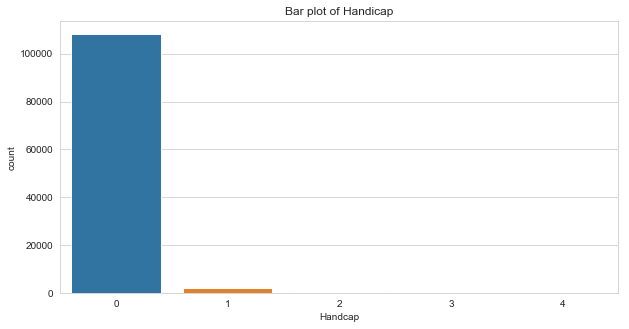

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [91]:
# variable "Handcap" is not binary, check its distribution
plt.figure(figsize=(10,5))
sns.countplot(x="Handcap", data=data)
plt.title('Bar plot of Handicap')
plt.show()
data.Handcap.value_counts()

The different categories of handicap may stand for different levels of disability.

We can create a binary variable representing not handicap(0) and handicap(1) for future comparing.

In [5]:
# create a binary variable "Handicap"
data['Handicap'] = (data.Handcap!=0).astype(int)

#### Check Numerical Variables<a id="ML2-4"></a>

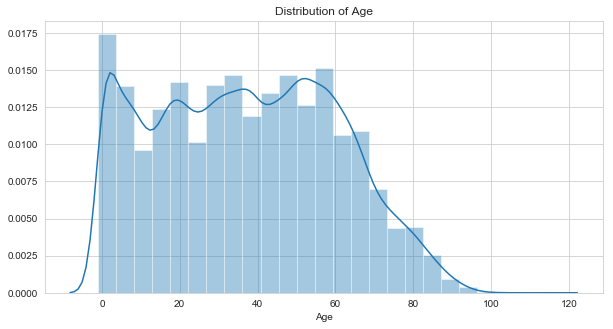

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [94]:
# check value distribution of variable "Age"
plt.figure(figsize=(10,5))
sns.distplot(data.Age, bins=25)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

data.Age.describe()

Negative values appear in "Age", we will take a closer look at it.

In [6]:
# check how many negative values are there in "Age" variable
print(f'Number of "Age" that have negative value: {sum(data.Age<0)}')

# remove the negative value from data set because it is apparently not valid
data = data[data.Age >= 0].reset_index()
print("Remove the negative age from data set because it is apparently not valid.")

Number of "Age" that have negative value: 1
Remove the negative age from data set because it is apparently not valid.


### 3. Exploratory Data Analysis and Feature Selection<a id="ML3"></a>

#### Exploring on "ScheduledDay" and "AppointmentDay"<a id="ML3-1"></a>

In [96]:
# display 'ScheduledDay' and 'AppointmentDay'
data.loc[:,['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay']].head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay
0,29872499824296,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,558997776694438,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,4262962299951,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,867951213174,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,8841186448183,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


"ScheduledDay" and "AppointmentDay" can not be directly use for analysis, we will extract following information from the two variables:

- month in ScheduledDay
- week day in ScheduledDay
- month in AppointmentDay
- week day in AppointmentDay
- awaiting days(AppointmentDay_Date - ScheduledDay_Date)

The "AppointmentDay" does not contain precise appointment time(in hour), hence we cannot obtain this information from the data set.

In [7]:
# create a new column "ScheduledDay_Date" containing the date in ScheduledDay.
data['ScheduledDay_Date'] = data.ScheduledDay.str.extract('(\d{4}-\d{2}-\d{2})', expand=True)

# create a new column "ScheduledDay_Month" containing the month in ScheduledDay.
data['ScheduledDay_Month'] = data.ScheduledDay_Date.str.extract('(\d{4}-)(\d{2})(-\d{2})', expand=True)[1].str.replace('0','')

# create a new column "ScheduledDay_Weekday" containing the week day in ScheduledDay.
data['ScheduledDay_Weekday'] = pd.to_datetime(data.ScheduledDay_Date).dt.weekday

# create a new column "AppointmentDay_Date" containing the date in AppointmentDay.
data['AppointmentDay_Date'] = data.AppointmentDay.str.extract('(\d{4}-\d{2}-\d{2})', expand=True)

# create a new column "AppointmentDay_Month" containing the month in AppointmentDay.
data['AppointmentDay_Month'] = data.AppointmentDay_Date.str.extract('(\d{4}-)(\d{2})(-\d{2})', expand=True)[1].str.replace('0','')

# create a new column "AppointmentDay_Weekday" containing the week day in AppointmentDay.
data['AppointmentDay_Weekday'] = pd.to_datetime(data.AppointmentDay_Date).dt.weekday

# create a new column "Awaiting_Days" containing only the awaiting time in days(AppointmentDay_Date - ScheduledDay_Date).
data['Awaiting_Days'] = ((pd.to_datetime(data.AppointmentDay_Date)-pd.to_datetime(data.ScheduledDay_Date))/np.timedelta64(1, 'D')).astype(int)

# display new columns
data.loc[:,['PatientId', 'AppointmentID', 'ScheduledDay_Date', 'ScheduledDay_Month', 'ScheduledDay_Weekday', 'AppointmentDay_Date', 'AppointmentDay_Month', 'AppointmentDay_Weekday', 'Awaiting_Days']].head()

,PatientId,AppointmentID,ScheduledDay_Date,ScheduledDay_Month,ScheduledDay_Weekday,AppointmentDay_Date,AppointmentDay_Month,AppointmentDay_Weekday,Awaiting_Days
0,1002280616,5642903,2016-04-29,4,4,2016-04-29,4,4,0
1,-806814554,5642503,2016-04-29,4,4,2016-04-29,4,4,0
2,-1940224977,5642549,2016-04-29,4,4,2016-04-29,4,4,0
3,367819382,5642828,2016-04-29,4,4,2016-04-29,4,4,0
4,2143753015,5642494,2016-04-29,4,4,2016-04-29,4,4,0


Let's plot out these new variables and see what kind of relationship it has with Show-up Rate.

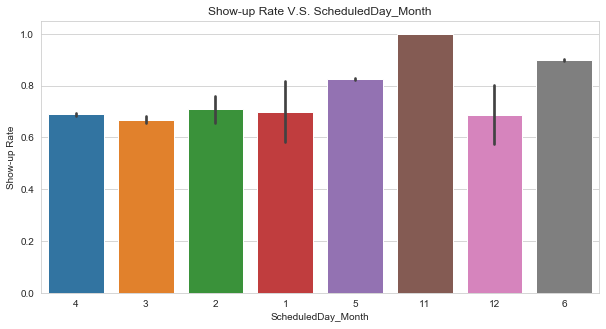

Number of records on each month: 
5     67421
4     25339
6     13749
3      3614
2       281
12       61
1        60
11        1
Name: ScheduledDay_Month, dtype: int64


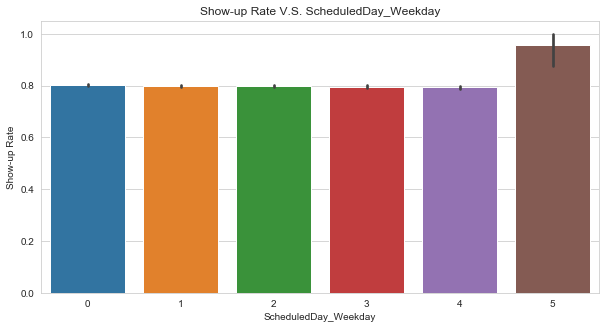

Number of records on each weekday: 
1    26168
2    24262
0    23084
4    18915
3    18073
5       24
Name: ScheduledDay_Weekday, dtype: int64


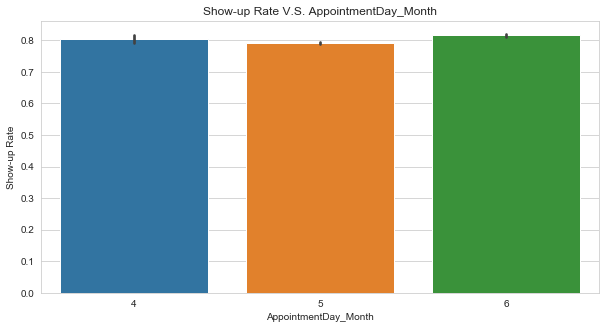

Number of records on each month: 
5    80841
6    26450
4     3235
Name: AppointmentDay_Month, dtype: int64


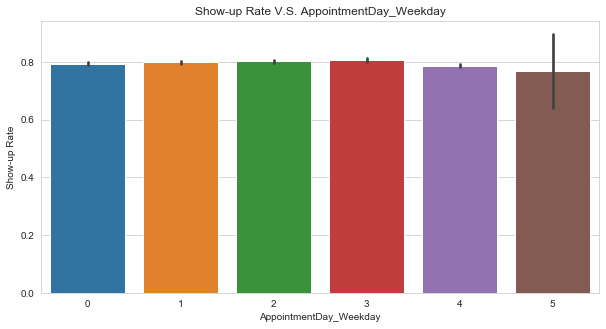

Number of records on each weekday: 
2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: AppointmentDay_Weekday, dtype: int64


In [8]:
# copy data to time_analysis and transform "Status" to dummy variable
time_analysis = data.copy()
time_analysis.Status = time_analysis.Status.astype('category').cat.rename_categories([1, 0]).astype(int)

# plot Show-up Rate V.S. ScheduledDay_Month
plt.figure(figsize=(10,5))
sns.barplot(x="ScheduledDay_Month", y="Status", data=time_analysis)
plt.title('Show-up Rate V.S. ScheduledDay_Month')
plt.ylabel("Show-up Rate")
plt.show()
# number of records on each ScheduledDay_Month
print("Number of records on each month: ")
print(time_analysis.ScheduledDay_Month.value_counts())

# plot Show-up Rate V.S. ScheduledDay_Weekday
plt.figure(figsize=(10,5))
sns.barplot(x="ScheduledDay_Weekday", y="Status", data=time_analysis)
plt.title('Show-up Rate V.S. ScheduledDay_Weekday')
plt.ylabel("Show-up Rate")
plt.show()
# number of records on each ScheduledDay_Weekday
print("Number of records on each weekday: ")
print(time_analysis.ScheduledDay_Weekday.value_counts())

# plot Show-up Rate V.S. AppointmentDay_Month
plt.figure(figsize=(10,5))
sns.barplot(x="AppointmentDay_Month", y="Status", data=time_analysis)
plt.title('Show-up Rate V.S. AppointmentDay_Month')
plt.ylabel("Show-up Rate")
plt.show()
# number of records on each AppointmentDay_Month
print("Number of records on each month: ")
print(time_analysis.AppointmentDay_Month.value_counts())

# plot Show-up Rate V.S. AppointmentDay_Weekday
plt.figure(figsize=(10,5))
sns.barplot(x="AppointmentDay_Weekday", y="Status", data=time_analysis)
plt.title('Show-up Rate V.S. AppointmentDay_Weekday')
plt.ylabel("Show-up Rate")
plt.show()
# number of records on each AppointmentDay_Weekday
print("Number of records on each weekday: ")
print(time_analysis.AppointmentDay_Weekday.value_counts())

Let's firstly look at Show-up Rate V.S. AppointmentDay_Month. The show-up rate in each month are nearly the same, in other words, it is very close to a uniform distribution. Because there is no evidence showing AppointmentDay_Month has any relationship with show-up rate, it is not a good attribute for machine learning model.

Show-up Rate V.S. ScheduledDay_Month gives us some insteresting insights. Month 1,2,3,4,12 have a small difference in show-up rate. Month 11 have extremely high show-up rate (100%), however, cause there is only one record existing in this month, we will treat it as a bias. Month 5 and 6 have high show-up rate compared with other months. We can create a binary variable for scheduled month 5 and 6.

Show-up Rate V.S. AppointmentDay_Weekday does not give us any useful insight, it is very close to a uniform distribution. AppointmentDay_Weekday is not a good attribute for machine learning model.

Show-up Rate V.S. ScheduledDay_Weekday does not give us any useful insight, it is very close to a uniform distribution. Although Saturday is obviously higher than other weekdays, number of records on this day are too small. AppointmentDay_Weekday is not a good attribute for machine learning model.

In [9]:
# create a binary variable "If_ScheduledMonth56"
data['If_ScheduledMonth56'] = data.ScheduledDay_Month.isin(['5','6']).astype(int)

Next, we will explore the relationship between Awaiting Days and Show-Up rate.

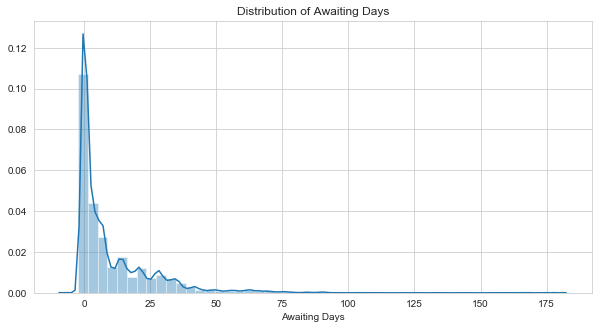

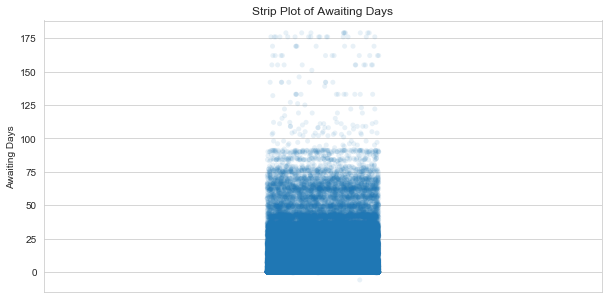

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Awaiting_Days, dtype: float64

In [100]:
# check value distribution of variable "Awaiting_Days" - distplot
plt.figure(figsize=(10,5))
sns.distplot(data.Awaiting_Days)
plt.title("Distribution of Awaiting Days")
plt.xlabel('Awaiting Days')

# check value distribution of variable "Awaiting_Days" - stripplot
plt.figure(figsize=(10,5))
sns.stripplot(data = time_analysis, y = 'Awaiting_Days', jitter = True, alpha = 0.1)
plt.title("Strip Plot of Awaiting Days")
plt.ylabel("Awaiting Days")
plt.xlabel("")

plt.show()

data.Awaiting_Days.describe()

- Most patients are planned their appointment few days in advance or even on the same day.
- Negative values appear in "Awaiting Days", we will take a closer look at it.

In [10]:
# check how many negative values are there in "Awaiting Days" variable
print(f'Number of "Awaiting Days" that have negative value: {sum(data.Awaiting_Days<0)}')

# remove the negative values from data set because they are apparently not valid
data = data[data.Awaiting_Days >= 0].reset_index()
print("Remove the negative awaiting days from data set because they are apparently not valid.")

Number of "Awaiting Days" that have negative value: 5
Remove the negative awaiting days from data set because they are apparently not valid.


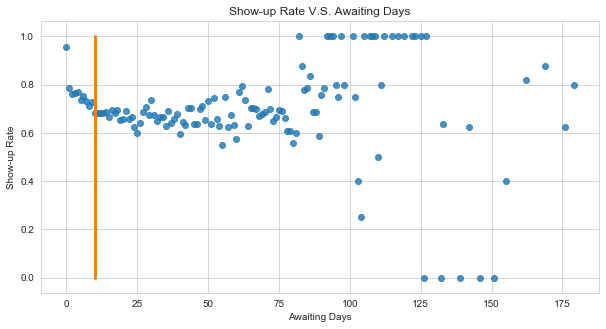

 Day  Showup_Rate  Num_Record  Num_Record_Perc
   0     0.953529       38562            34.89
   1     0.786495        5213             4.72
   2     0.761784        6725             6.08
   3     0.764706        2737             2.48
   4     0.767297        5290             4.79
   5     0.733903        3277             2.97
   6     0.752044        4037             3.65
   7     0.733184        4906             4.44
   8     0.712693        2332             2.11
   9     0.725857        1605             1.45
  10     0.683681        1391             1.26
Awaiting time for less than or equal to 10 days represent 68.84% of data in entire data set.


In [11]:
# copy data to time_analysis and transform "Status" to dummy variable
time_analysis = data.copy()
time_analysis.Status = time_analysis.Status.astype('category').cat.rename_categories([1, 0]).astype(int)

# calculate number of records for each "Awaiting Day"
awaiting_valuecount = time_analysis.Awaiting_Days.value_counts()
awaiting_valuecount = pd.DataFrame({"day": awaiting_valuecount.index.values, "num_record": np.array(awaiting_valuecount)})
awaiting_valuecount = awaiting_valuecount.sort_values(by=['day'], ascending=True)
awaiting_valuecount['num_record_perc'] = round(100 * awaiting_valuecount.num_record/len(data),2)

# group by Awaiting Days and calculate its show-up rate
showup_rate = time_analysis.groupby("Awaiting_Days")["Status"].mean()
day = np.sort(time_analysis.Awaiting_Days.unique())
awaiting_analysis = pd.DataFrame({"Day":day, "Showup_Rate":np.array(showup_rate), "Num_Record":np.array(awaiting_valuecount.num_record), "Num_Record_Perc": np.array(awaiting_valuecount.num_record_perc)})

# plot Showup Rate V.S. Awaiting Days 
plt.figure(figsize=(10,5))
sns.regplot(x="Day", y="Showup_Rate", data=awaiting_analysis, ci=False, fit_reg=False)
plt.plot([10, 10], [1, 0], linewidth=3)
plt.title("Show-up Rate V.S. Awaiting Days")
plt.xlabel('Awaiting Days')
plt.ylabel('Show-up Rate')
plt.show()
print(awaiting_analysis.head(11).to_string(index=False))
perc_top10 = round(sum(awaiting_analysis.Num_Record_Perc.head(11)),2)
print(f"Awaiting time for less than or equal to 10 days represent {perc_top10}% of data in entire data set.")

Although the entire distribution of Showup Rate V.S. Awaiting Days does not show a strong relationship, awaiting time for less than or equal to 10 days show a distinctly negative relationship. Especially, people who scheduled his/her appoinment on the same day will have a obviously high show-up rate and this type of situation represent 34.89% of data in entire data set.

We will create one binary variable to represent:

- People who scheduled his/her appoinment on the same day

For those points that reach either 1 or 0 show-up rate are caused by too small sample size on that "Awaiting Days".

In [12]:
# create a binary variable "If_0Await"
data['If_0Await'] = (data.Awaiting_Days==0).astype(int)

#### Exploring on Given Binary Dummy Variables<a id="ML3-2"></a>

Variables include: Scholarship, Hipertension, Diabetes, Alcoholism, Handicap, SMS_received

In [13]:
# copy data to dummy_analysis and transform "Status" to dummy variable
dummy_analysis = data.copy()
dummy_analysis.Status = dummy_analysis.Status.astype('category').cat.rename_categories([1, 0]).astype(int)

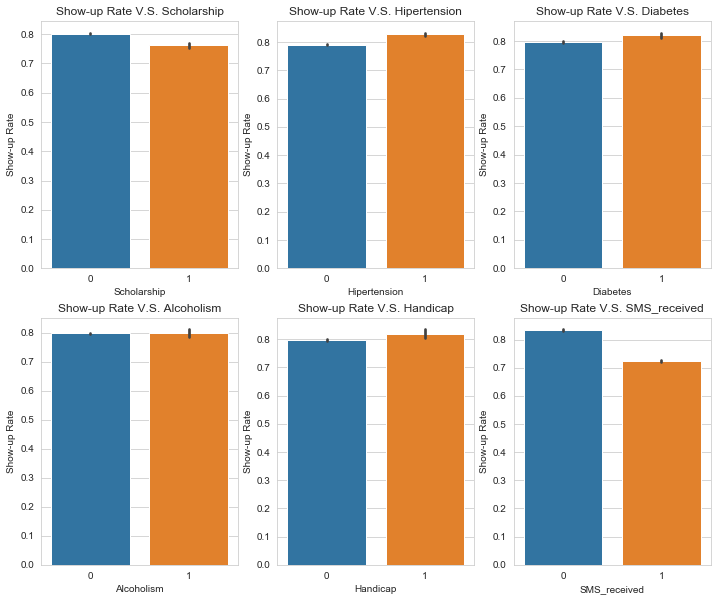

In [105]:
# plot Show-up Rate V.S. Binary Dummy Variables
plt.figure(figsize=(12,10))
plt.subplot(2, 3, 1)
sns.barplot(x="Scholarship", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. Scholarship')
plt.ylabel("Show-up Rate")

plt.subplot(2, 3, 2)
sns.barplot(x="Hipertension", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. Hipertension')
plt.ylabel("Show-up Rate")

plt.subplot(2, 3, 3)
sns.barplot(x="Diabetes", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. Diabetes')
plt.ylabel("Show-up Rate")

plt.subplot(2, 3, 4)
sns.barplot(x="Alcoholism", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. Alcoholism')
plt.ylabel("Show-up Rate")

plt.subplot(2, 3, 5)
sns.barplot(x="Handicap", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. Handicap')
plt.ylabel("Show-up Rate")

plt.subplot(2, 3, 6)
sns.barplot(x="SMS_received", y="Status", data=dummy_analysis)
plt.title('Show-up Rate V.S. SMS_received')
plt.ylabel("Show-up Rate")

plt.show()

Show-up Rate V.S. Alcoholism shows a uniform distribution. Either Alcoholism or not Alcoholism have around 80% Show-up rate, this feature may not add much value while building a model.

The distribution of Show-up Rate V.S. SMS_received does not make sense. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. This discrepancy may cause by human error when collecting data. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.

Hence, "Alcoholism" and "SMS_received" are not good predictors for machine learning model.

#### Exploring on "Neighbourhood"<a id="ML3-3"></a>

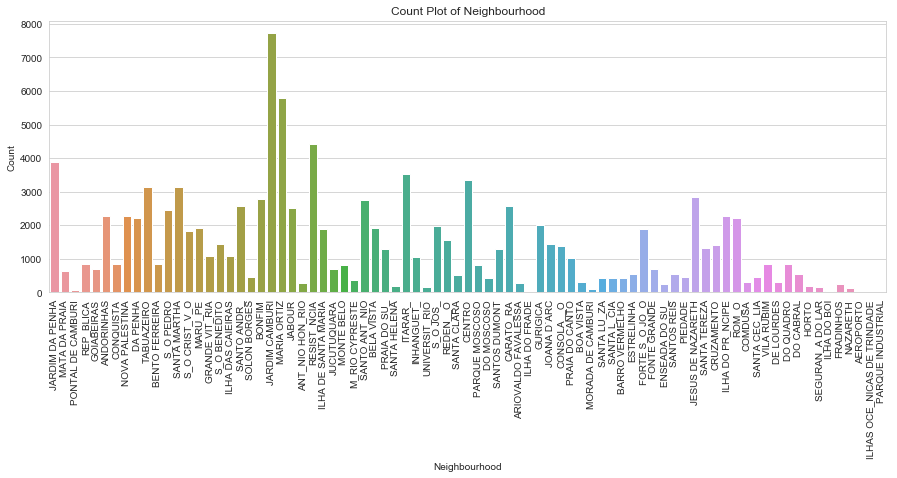

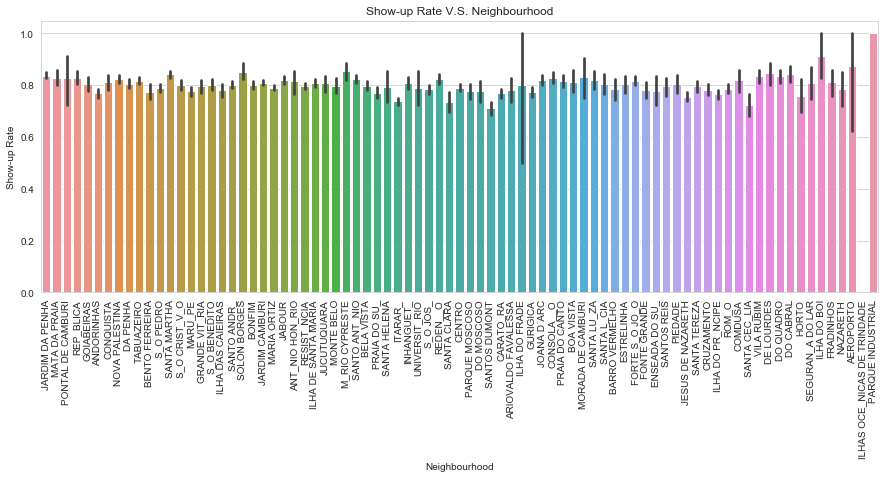

In [106]:
# plot distribution of variable Neighbourhood
plt.figure(figsize=(15,5))
sns.countplot(x="Neighbourhood", data=dummy_analysis)
plt.xticks(rotation=90)
plt.title("Count Plot of Neighbourhood")
plt.xlabel('Neighbourhood')
plt.ylabel("Count")
plt.show()

# plot Show-up Rate V.S. Neighbourhood
plt.figure(figsize=(15,5))
sns.barplot(x="Neighbourhood", y="Status", data=dummy_analysis)
plt.xticks(rotation=90)
plt.title('Show-up Rate V.S. Neighbourhood')
plt.ylabel("Show-up Rate")
plt.show()

From the Count Plot of Neighbourhood, we can see that the number of patients for few Neighbourhood's is very high.

The distribution of Show-up Rate V.S. Neighbourhood is close to uniform. Show-up Rate may not stongly relavent to location.

Hence, "Neighbourhood" may not play an important role in determining if a patient comes for a visit or not.

#### Exploring on "Age"<a id="ML3-4"></a>

In [14]:
# check if data set contains duplicated patient ID
data.PatientId = data.PatientId.astype(int)
data.PatientId.duplicated().sum()

48223

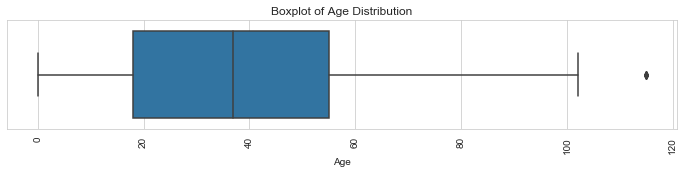

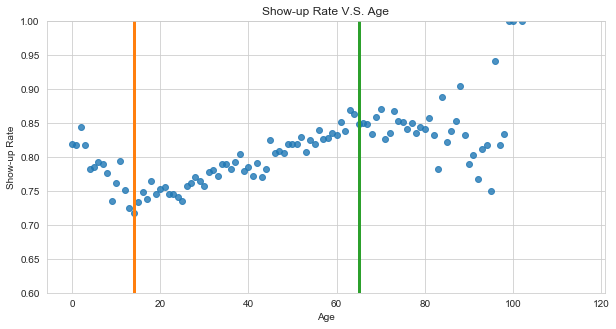

In [15]:
age_showup_rate = dummy_analysis.groupby(['Age'])['Status'].mean()
age_showup_rate = pd.DataFrame({"Age": age_showup_rate.index, "Showup_Rate": np.array(age_showup_rate)})

# boxplot of Age distribution
plt.figure(figsize=(12,2))
sns.boxplot(x="Age", data=dummy_analysis)
plt.xticks(rotation=90)
plt.title("Boxplot of Age Distribution")
plt.show()

# scatter plot of Show-up Rate V.S. Age
plt.figure(figsize=(10,5))
sns.regplot(x="Age", y="Showup_Rate", data=age_showup_rate, fit_reg=False)
plt.ylim(0.6,1)
plt.plot([14, 14], [1, 0], linewidth=3)
plt.plot([65, 65], [1, 0], linewidth=3)
plt.title("Show-up Rate V.S. Age")
plt.xlabel('Age')
plt.ylabel('Show-up Rate')
plt.show()

From the above Boxplot we can see that the Median Age is around 35 and the IQR is between 18 and 55. Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.

The Scatter plot of Show-up Rate V.S. Age shows an obvious piecewise relationship.

- Age 0-14: negatively related between Age and Show-up Rate
- Age 15-65: positively related between Age and Show-up Rate
- Age above 65: no clear relationship

#### Exploring on "Gender"<a id="ML3-5"></a>

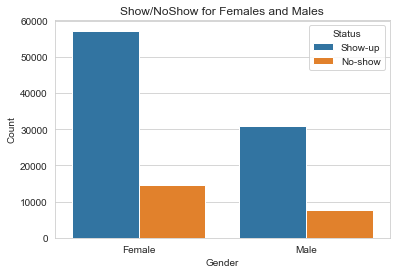

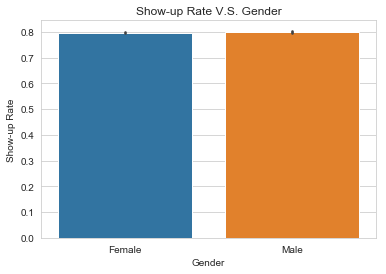

In [109]:
# plot Show/NoShow for Females and Males
sns.countplot(x="Gender", hue="Status", data=data).set_xticklabels(['Female', 'Male'])
plt.title("Show/NoShow for Females and Males")
plt.ylabel("Count")
plt.show()

# plot Show-up Rate V.S. Gender
sns.barplot(x="Gender", y="Status", data=dummy_analysis).set_xticklabels(['Female', 'Male'])
plt.title('Show-up Rate V.S. Gender')
plt.ylabel("Show-up Rate")
plt.show()

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not.

#### Exploring on "PatientId"<a id="ML3-6"></a>

In [16]:
# count patient repeat frequency and their show-up rate
patient_count = dummy_analysis.groupby(['PatientId']).Status.count()
patient_count.name = 'Frequency'
patient_mean = dummy_analysis.groupby(['PatientId']).Status.mean()
patient_mean.name = 'Showup_Rate'
patient_analysis = pd.concat([patient_count, patient_mean], axis=1).reset_index()

# count number of patients in each frequency group and get corresponding show-up rate
freq_showup_rate = patient_analysis.groupby(['Frequency']).Showup_Rate.mean()
freq_showup_rate.name = "Avg_rate"
freq_cnt = patient_analysis.groupby(['Frequency']).Frequency.count()
freq_cnt.name = "Patient_cnt"
patient_anal = pd.concat([freq_cnt, freq_showup_rate], axis=1).reset_index()
patient_anal.head()

,Frequency,Patient_cnt,Avg_rate
0,1,37920,0.812263
1,2,13895,0.793091
2,3,5499,0.790932
3,4,2369,0.778388
4,5,1117,0.787287


In [17]:
# log transform
patient_anal_vis = patient_anal.copy()
patient_anal_vis.Patient_cnt = np.log(1 + patient_anal_vis.Patient_cnt) * 50

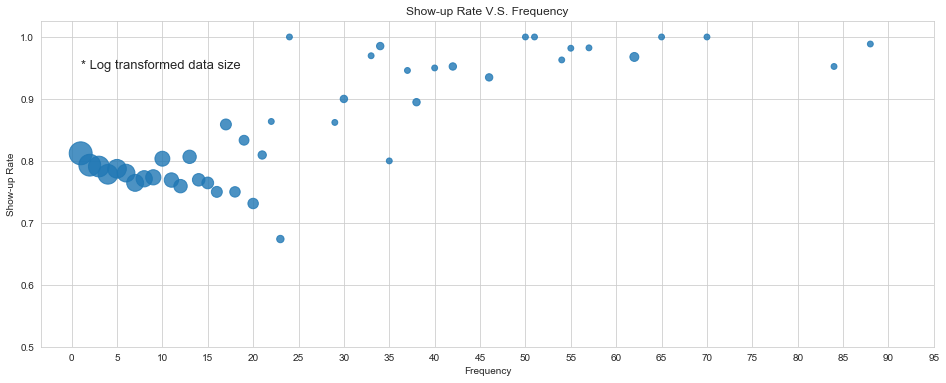

,Frequency,Patient_cnt,Avg_rate
0,1,37920,0.812263
1,2,13895,0.793091
2,3,5499,0.790932
3,4,2369,0.778388
4,5,1117,0.787287


In [18]:
plt.figure(figsize=(16, 6))
plt.scatter(x="Frequency", y="Avg_rate", s="Patient_cnt", alpha = 0.8, data=patient_anal_vis) 

# Adapt the ticks on x-axis and y-axis
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0.5, 1.05, 0.1))

# labels
plt.xlabel('Frequency')
plt.ylabel('Show-up Rate')
plt.title('Show-up Rate V.S. Frequency')

# Additional customizations
plt.text(1, 0.95, '* Log transformed data size', size = 13)

# Add grid() call
plt.grid(True)

# Show plot
plt.show()

# stats
patient_anal.head(5)

According to the distribution of Show-up Rate of Repeat Patients, we can see that majority of repeat patients went for their scheduled appoinments.

#### - Define "credit" patient

In [113]:
patient_analysis.head()

,PatientId,Frequency,Showup_Rate
0,39218,1,1.0
1,43742,1,1.0
2,93780,1,1.0
3,141724,1,1.0
4,537615,1,1.0


In [19]:
# Define "credit" patient
from pandasql import sqldf

q = """
SELECT PatientId
FROM patient_analysis 
WHERE Showup_Rate >= 0.8
AND Frequency >= 2
"""

credit_patient = sqldf(q)
len(credit_patient)

14645

In [20]:
# create a binary variable "If_Credit_Patient"
data['If_Credit_Patient'] = data.PatientId.isin(credit_patient.PatientId).astype(int)
data.head()

,level_0,index,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,...,ScheduledDay_Date,ScheduledDay_Month,ScheduledDay_Weekday,AppointmentDay_Date,AppointmentDay_Month,AppointmentDay_Weekday,Awaiting_Days,If_ScheduledMonth56,If_0Await,If_Credit_Patient
0,0,0,1002280616,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,...,2016-04-29,4,4,2016-04-29,4,4,0,0,1,1
1,1,1,-806814554,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,...,2016-04-29,4,4,2016-04-29,4,4,0,0,1,1
2,2,2,-1940224977,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,...,2016-04-29,4,4,2016-04-29,4,4,0,0,1,1
3,3,3,367819382,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,...,2016-04-29,4,4,2016-04-29,4,4,0,0,1,0
4,4,4,2143753015,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,...,2016-04-29,4,4,2016-04-29,4,4,0,0,1,0


## 4. Building Models on Imbalanced Data<a id="ML4"></a>

From the EDA we see that there are around 80% of the patients who have turned up. We see a clear class imbalance problem here. A naive approach of predicting that every one shows up gives us an accuracy of 0.8. Below we shall see how well the classifiers score on this dataset.

### Transforming the Data Set<a id="ML4-1"></a>

In order to test how well a ML model can predict the 'No-show' patients,
I set 'No-show' as positive class (1), 'Show-up' as negative class (0).

In [21]:
# transfrom category variables
le = preprocessing.LabelEncoder()

data.Status = (data.Status == 'No-show').astype(int)

data.Gender = le.fit_transform(data.Gender)
data.Neighbourhood = le.fit_transform(data.Neighbourhood)

### Define Feature Matrix and Target Array<a id="ML4-2"></a>

According to analysis result from EDA and after some features tuning, I selected below attributes as the predictors.

In [22]:
# select attributes for machine learning models
X = data.loc[:,['If_Credit_Patient', 'Gender', "Age", 'Scholarship', 'Hipertension', 'Diabetes', 'Handcap', "Neighbourhood", "ScheduledDay_Month", "Awaiting_Days", "Handicap", "If_0Await", "If_ScheduledMonth56"]]
y = data['Status']

In [23]:
# display feature matrix and target array
pd.concat([X,y], axis=1).rename({"0":"Status"}).head()

,If_Credit_Patient,Gender,Age,Scholarship,Hipertension,Diabetes,Handcap,Neighbourhood,ScheduledDay_Month,Awaiting_Days,Handicap,If_0Await,If_ScheduledMonth56,Status
0,1,0,62,0,1,0,0,39,5,0,0,1,0,0
1,1,1,56,0,0,0,0,39,5,0,0,1,0,0
2,1,0,62,0,0,0,0,45,5,0,0,1,0,0
3,0,0,8,0,0,0,0,54,5,0,0,1,0,0
4,0,0,56,0,1,1,0,39,5,0,0,1,0,0


### Prepare Data for Model Training<a id="ML4-3"></a>

In [24]:
# test - perform grid search on randomforest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In data preparation, I randomly selected 5000 data from model data set to create a smaller data set for gridsearch. I also created train and test data by splitting the model data set to 80-20.

In [25]:
# perform gridsearch on a smaller sampled dataset(otherwise it takes forever to run)
random_index = random.sample(list(range(len(data))), 5000)
X = X.values
y = y.values

# split data set to train and test(80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Model - Logistic Regression<a id="ML4-4"></a>

I followed below steps to assess the model(logistic regression) on imbalanced data set:
1. perform grid search on a selected sample dataset
2. perform cross validation on model with parameters calculated from grid search
3. calculate accuracy score from Train-Test Split(80-20)
4. calculate precision score (What percentage of 'No-show' instances has been correctly predicted in total **predicted** 'No-show' instances)
5. calculate recall score (What percentage of 'No-show' instances has been correctly predicted in total **true** 'No-show' instances)
6. calculate F1 score
7. calculate accuracy of positive/negative class (What percentage of 'No-show'/'Show-up' have been correctly predicted in their own **true** class instances)

In [26]:
# Grid Search on selected sample dataset
param_grid = {"penalty": ['l1', 'l2']
              ,"C" : [0.01, 0.1, 1, 10, 100]}

clf_log = LogisticRegression()
clf_log = GridSearchCV(clf_log, param_grid, cv=5, scoring='accuracy')
clf_log.fit(X[random_index], y[random_index])
print(clf_log.best_params_)

{'C': 10, 'penalty': 'l2'}


In [27]:
# Perform cross validation on Logistic Regression model with parameters calculated from Grid Search
log = clf_log.best_estimator_
log.fit(X, y)
CVscore = cross_val_score(log, X, y, cv=5)
log_CVscore = CVscore.mean()
print(f' Cross validation scores: {CVscore}')
print(f' Average score: {log_CVscore}')

 Cross validation scores: [0.80180955 0.79487875 0.79157619 0.79768368 0.79890518]
 Average score: 0.7969706676660753


In [28]:
# Feed Logistic Regression model
log = clf_log.best_estimator_
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy score from Train-Test Split(80-20)
log_score = accuracy_score(y_pred, y_test)
print(f' Train-Test Split(80-20) accuracy score: {log_score}')

# Precision score
log_precision_score = precision_score(y_test, y_pred)
print(f' Precision score: {log_precision_score}')

# Recall score
log_recall_score = recall_score(y_test, y_pred)
print(f' Recall score: {log_recall_score}')

# F1 score
log_f1 = f1_score(y_test, y_pred)
print(f' F1 score: {log_f1}')

# Confusion matrix: Accuracy of positive/negative class
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
log_acc_p = tp/(tp+fn)
log_acc_n = tn/(tn+fp)
print(" Accuracy of positive class:",log_acc_p)
print(" Accuracy of negative class:",log_acc_n)

 Train-Test Split(80-20) accuracy score: 0.7980547387468898
 Precision score: 0.5166666666666667
 Recall score: 0.08975501113585746
 F1 score: 0.15294117647058822
 Accuracy of positive class: 0.08975501113585746
 Accuracy of negative class: 0.9785977859778597


From the above CV and accuracy score we can see that we are doing almost similar to the naive predictor. 

If you look at the accuracy of positive/negative class, you will find that the model predicted almost all instances to 'Show-up' but few 'No-show'. The precision score of 'No-show' is too low to prove model's ability on predicting 'No-show'.

The F1 shows that the model is not good enough on predicting. It maybe even better to just use naive predictor. Therefore, in this case, we are difficult to extract essence from the model.

## 5. Building Models on Balanced Data<a id="ML5"></a>

### Create Balanced Data Set<a id="ML5-1"></a>

We can change the dataset that we use to build the predictive model to have more balanced data.

This change is called sampling dataset and there are two main methods that we can use to even-up the classes:

1. Adding copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or
2. Deleting instances from the over-represented class, called under-sampling.

### Prepare Data for Model Training<a id="ML5-2"></a>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# test-what am i doing
def ML_LG(X_train, y_train, w0=1, w1=1):
    # Feed Logistic Regression model
    log = LogisticRegression(class_weight={0: w0, 1: w1})
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)

    # Accuracy score from Train-Test Split(80-20)
    log_score = accuracy_score(y_pred, y_test)
    print(f' Train-Test Split(80-20) accuracy score: {log_score}')

    # Precision score
    log_precision_score = precision_score(y_test, y_pred)
    print(f' Precision score: {log_precision_score}')

    # Recall score
    log_recall_score = recall_score(y_test, y_pred)
    print(f' Recall score: {log_recall_score}')

    # F1 score
    log_f1 = f1_score(y_test, y_pred)
    print(f' F1 score: {log_f1}')

    # Confusion matrix: Accuracy of positive/negative class
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    log_acc_p = tp/(tp+fn)
    log_acc_n = tn/(tn+fp)
    print(" Accuracy of positive class:",log_acc_p)
    print(" Accuracy of negative class:",log_acc_n)

In [31]:
#unbalanced performance
ML_LG(X_train, y_train)

 Train-Test Split(80-20) accuracy score: 0.7958380456910201
 Precision score: 0.49570552147239266
 Recall score: 0.08965823346648913
 F1 score: 0.15185115579778238
 Accuracy of positive class: 0.08965823346648913
 Accuracy of negative class: 0.976646400363657


#### Method1: OverSampling-SMOTE

In [129]:
print("Number data X_train dataset: ", X_train.shape)
print("Number data y_train dataset: ", y_train.shape)
print("Number data X_test dataset: ", X_test.shape)
print("Number data y_test dataset: ", y_test.shape)

Number data X_train dataset:  (88416, 13)
Number data y_train dataset:  (88416,)
Number data X_test dataset:  (22105, 13)
Number data y_test dataset:  (22105,)


In [130]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 17826
Before OverSampling, counts of label '0': 70590 



In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [132]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (141180, 13)
After OverSampling, the shape of train_y: (141180,) 



In [133]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 70590
After OverSampling, counts of label '0': 70590


In [134]:
# SMOTE result
ML_LG(X_train_res, y_train_res)

 Train-Test Split(80-20) accuracy score: 0.7379325944356481
 Precision score: 0.4262461851475076
 Recall score: 0.8402406417112299
 F1 score: 0.5655793025871766
 Accuracy of positive class: 0.8402406417112299
 Accuracy of negative class: 0.7118692172333542


#### Method2: RandomUnderSampler

In [135]:
print("Number data X_train dataset: ", X_train.shape)
print("Number data y_train dataset: ", y_train.shape)
print("Number data X_test dataset: ", X_test.shape)
print("Number data y_test dataset: ", y_test.shape)

Number data X_train dataset:  (88416, 13)
Number data y_train dataset:  (88416,)
Number data X_test dataset:  (22105, 13)
Number data y_test dataset:  (22105,)


In [136]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 17826
Before OverSampling, counts of label '0': 70590 



In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=123)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [138]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (35652, 13)
After OverSampling, the shape of train_y: (35652,) 



In [139]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 17826
After OverSampling, counts of label '0': 17826


In [140]:
# RandomUnderSampler result
ML_LG(X_train_res, y_train_res)

 Train-Test Split(80-20) accuracy score: 0.7319158561411445
 Precision score: 0.42336388829673843
 Recall score: 0.8850267379679144
 F1 score: 0.5727469358327326
 Accuracy of positive class: 0.8850267379679144
 Accuracy of negative class: 0.6929102571379917


After substituting all the models into the method of balancing data described above, the best performing method of each model was selected

### Logistic Regression<a id="ML5-3"></a>

In [32]:
# perform gridsearch on a smaller sampled dataset(otherwise it takes forever to run)
random_index = random.sample(list(range(len(X))), 5000)

In [33]:
# Grid Search on selected sample dataset
param_grid = {"penalty": ['l1', 'l2']
              ,"C" : [0.01, 0.1, 1, 10, 100]}

clf_log = LogisticRegression()
clf_log = GridSearchCV(clf_log, param_grid, cv=5, scoring='accuracy')
clf_log.fit(X[random_index], y[random_index])
print(clf_log.best_params_)

{'C': 10, 'penalty': 'l2'}


In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=123)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [35]:
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After UnderSampling, counts of label '1': 17808
After UnderSampling, counts of label '0': 17808


In [36]:
# Feed Logistic Regression model
log = clf_log.best_estimator_
log.fit(X_train_res, y_train_res)
y_pred = log.predict(X_test)

# Accuracy score from Train-Test Split(80-20)
log_score = accuracy_score(y_pred, y_test)
print(f' Train-Test Split(80-20) accuracy score: {log_score}')

# Precision score
log_precision_score = precision_score(y_test, y_pred)
print(f' Precision score: {log_precision_score}')

# Recall score
log_recall_score = recall_score(y_test, y_pred)
print(f' Recall score: {log_recall_score}')

# F1 score
log_f1 = f1_score(y_test, y_pred)
print(f' F1 score: {log_f1}')

# Confusion matrix: Accuracy of positive/negative class
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
log_acc_p = tp/(tp+fn)
log_acc_n = tn/(tn+fp)
print(" Accuracy of positive class:",log_acc_p)
print(" Accuracy of negative class:",log_acc_n)

 Train-Test Split(80-20) accuracy score: 0.7287039131418231
 Precision score: 0.4210191757601441
 Recall score: 0.8819351975144252
 F1 score: 0.5699533883112227
 Accuracy of positive class: 0.8819351975144252
 Accuracy of negative class: 0.6894709926700381


### Random Forest Classifier<a id="ML5-5"></a>

In [37]:
# Grid Search on selected sample dataset
param_grid = {"max_depth": list(np.arange(2,11,1))
              ,"min_samples_split" : list(np.arange(2,21,1))} 

clf_rf = RandomForestClassifier()
clf_rf = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy')
clf_rf.fit(X[random_index], y[random_index])
print(clf_rf.best_params_)

{'max_depth': 7, 'min_samples_split': 3}


In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [39]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 70608
After OverSampling, counts of label '0': 70608


In [40]:
# Perform further validation metrics on RandomForest model with parameters calculated from Grid Search
rf = clf_rf.best_estimator_
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)

# Accuracy score from Train-Test Split(80-20)
rf_score = accuracy_score(y_pred, y_test)
print(f' Train-Test Split(80-20) accuracy score: {rf_score}')

# Precision score
rf_precision_score = precision_score(y_test, y_pred)
print(f' Precision score: {rf_precision_score}')

# Recall score
rf_recall_score = recall_score(y_test, y_pred)
print(f' Recall score: {rf_recall_score}')

# F1 score
rf_f1 = f1_score(y_test, y_pred)
print(f' F1 score: {rf_f1}')

# Confusion matrix: Accuracy of positive/negative class
conf_matrix = confusion_matrix(y_test, y_pred)
rf_acc_p = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
rf_acc_n = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print(" Accuracy of positive class:",rf_acc_p)
print(" Accuracy of negative class:",rf_acc_n)

 Train-Test Split(80-20) accuracy score: 0.7371182990273694
 Precision score: 0.4267265581134194
 Recall score: 0.8433200177541056
 F1 score: 0.5666989784505257
 Accuracy of positive class: 0.8433200177541056
 Accuracy of negative class: 0.7099267003807035


### K-Nearest Neighbors Classifier<a id="ML5-8"></a>

In [41]:
# Grid Search on selected sample dataset
param_grid = {"n_neighbors": list(np.arange(2,31,2))
              ,"weights" : ["uniform", "distance"]
              ,"leaf_size": list(np.arange(2,21,2))}

clf_knn = KNeighborsClassifier()
clf_knn = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
clf_knn.fit(X[random_index], y[random_index])
print(clf_knn.best_params_)

{'leaf_size': 2, 'n_neighbors': 28, 'weights': 'uniform'}


In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [43]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 70608
After OverSampling, counts of label '0': 70608


In [44]:
# Perform further validation metrics on KNN model with parameters calculated from Grid Search
knn = clf_knn.best_estimator_
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)

# Accuracy score from Train-Test Split(80-20)
knn_score = accuracy_score(y_pred, y_test)
print(f' Train-Test Split(80-20) accuracy score: {knn_score}')

# Precision score
knn_precision_score = precision_score(y_test, y_pred)
print(f' Precision score: {knn_precision_score}')

# Recall score
knn_recall_score = recall_score(y_test, y_pred)
print(f' Recall score: {knn_recall_score}')

# F1 score
knn_f1 = f1_score(y_test, y_pred)
print(f' F1 score: {knn_f1}')

# Confusion matrix: Accuracy of positive/negative class
conf_matrix = confusion_matrix(y_test, y_pred)
knn_acc_p = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
knn_acc_n = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print(" Accuracy of positive class:",knn_acc_p)
print(" Accuracy of negative class:",knn_acc_n)

 Train-Test Split(80-20) accuracy score: 0.6394028500339289
 Precision score: 0.3266633316658329
 Recall score: 0.724589436307146
 F1 score: 0.45031377146403695
 Accuracy of positive class: 0.724589436307146
 Accuracy of negative class: 0.6175919086311722


## 6. Conclusion<a id="6"></a>

### Result Summary<a id="6-1"></a>

In [46]:
# build a dataframe for model results
log_result = np.round([log_score, log_precision_score, log_recall_score, log_f1, log_acc_p, log_acc_n],3)
rf_result = np.round([rf_score, rf_precision_score, rf_recall_score, rf_f1, rf_acc_p, rf_acc_n],3)
knn_result = np.round([knn_score, knn_precision_score, knn_recall_score, knn_f1, knn_acc_p, knn_acc_n],3)

ml_results = pd.DataFrame([log_result, rf_result,  knn_result], 
                          columns=['Accuracy_Score', 'Precision_Score', 'Recall_Score', 'F1_Score', 'Accuracy_NoShow', 'Accuracy_ShowUp'],
                          index=['Logistic Regression', 'Random Forest',  'KNearest Neighbors'])

ml_results

,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,Accuracy_NoShow,Accuracy_ShowUp
Logistic Regression,0.729,0.421,0.882,0.570,0.882,0.689
Random Forest,0.737,0.427,0.843,0.567,0.843,0.710
KNearest Neighbors,0.639,0.327,0.725,0.450,0.725,0.618


### Features Importance<a id="6-2"></a>

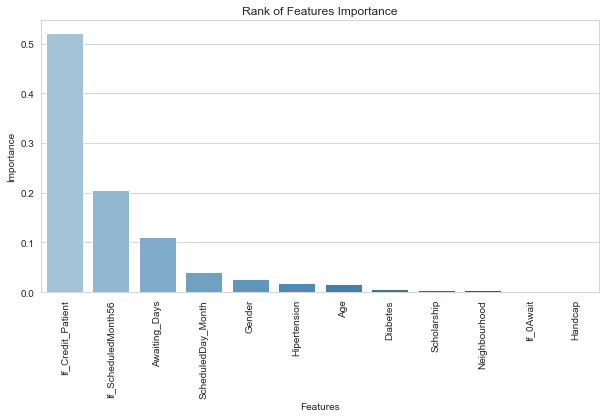

In [47]:
# features importance from random forest model
features_name = ['If_Credit_Patient', 'Gender', "Age", 'Scholarship', 'Hipertension', 'Diabetes', 'Handcap', "Neighbourhood", "ScheduledDay_Month", "Awaiting_Days", "If_0Await", "If_ScheduledMonth56"]

features_importance = pd.DataFrame([features_name, list(rf.feature_importances_)], index=['Feature', 'Importance']).T
features_importance = features_importance.sort_values(by=['Importance'], ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Feature", y="Importance", data=features_importance, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Rank of Features Importance")
plt.xlabel('Features')
plt.ylabel("Importance")
plt.show()

According to the actual case situation, we hope that the hospital can accurately identify the patients who cannot come in order to allocate resources reasonably, but not allow insufficient resources to occur.Therefore, a high Precision score of positive class is required to accurately identify patients that do not appear, and a high Accuracy of negative class is required to ensure that the hospital has sufficient resources.

Combing the above and accuracy,the random forest with the best perfroming is selected as the final model. The model can predict patient missed appointments with an accuracy rate of 73.7%, thereby helping the hospital to allocate resources rationally.